In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
admission_dataset=pd.read_csv(r'C:\Users\HP\Downloads\Admission.csv')
admission_dataset.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


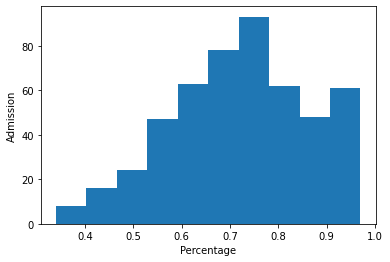

In [2]:
plt.hist(admission_dataset['Admit'])
plt.xlabel("Percentage")
plt.ylabel("Admission")
plt.show()


In [3]:
X = admission_dataset.iloc[:,:-1].values 
y = admission_dataset.iloc[:, -1].values 


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
X_train.shape

(375, 8)

In [6]:
y_train.shape

(375,)

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=0)

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
y_pred

array([0.6218, 0.8388, 0.7734, 0.8834, 0.627 , 0.6018, 0.5522, 0.7014,
       0.5692, 0.7656, 0.6502, 0.716 , 0.648 , 0.7888, 0.8922, 0.5428,
       0.8048, 0.6774, 0.785 , 0.5014, 0.5158, 0.7242, 0.5614, 0.9268,
       0.841 , 0.721 , 0.6124, 0.5372, 0.5544, 0.6434, 0.7308, 0.4382,
       0.6098, 0.834 , 0.6134, 0.5534, 0.8546, 0.8988, 0.6456, 0.7042,
       0.678 , 0.8986, 0.8916, 0.6932, 0.671 , 0.7796, 0.9606, 0.808 ,
       0.6382, 0.6348, 0.6662, 0.629 , 0.6542, 0.799 , 0.7144, 0.817 ,
       0.5638, 0.8942, 0.6616, 0.6926, 0.4018, 0.923 , 0.6584, 0.9438,
       0.7518, 0.6824, 0.6452, 0.8522, 0.521 , 0.662 , 0.9232, 0.7262,
       0.729 , 0.6584, 0.8212, 0.9166, 0.755 , 0.6744, 0.5496, 0.694 ,
       0.6344, 0.902 , 0.5706, 0.6982, 0.7772, 0.5814, 0.8078, 0.6848,
       0.4666, 0.5826, 0.74  , 0.7826, 0.6956, 0.7022, 0.6594, 0.9346,
       0.5528, 0.5532, 0.5594, 0.673 , 0.9246, 0.7514, 0.9534, 0.6422,
       0.6362, 0.5872, 0.6504, 0.8614, 0.713 , 0.7414, 0.4708, 0.5888,
      

In [10]:
from sklearn import metrics
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.04 degrees.
Accuracy: 93.39 %.


C:\Users\HP\anaconda3\envs\mlclass\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\mlclass\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


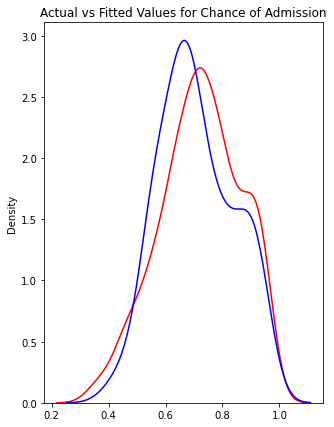

In [12]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Chance of Admission')


plt.show()
plt.close()


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0400944
Mean Squared Error: 0.0031605827199999987
Root Mean Squared Error: 0.056219060113096866
